In [17]:
%matplotlib inline

In [18]:
from fenics import *
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [19]:
def plot_states_and_control(U, Q, T, kw_u, kw_q, num_steps, num_plots=5):
    '''
        Function to plot states along with corresponding
        control for each time.
    '''
    
    assert len(U) == len(Q), "Lengths of arrays do not match"
    
    dt = T/num_steps
    indx = np.linspace(0, len(U)-1, num_plots, dtype=int)
    
    for i in indx:
        u_n = U[i]
        q_n = Q[i]
        t = i*dt
        
        if i == 0:
            utitle = "Initial value"
            qtitle = "Initial control"
        else:
            utitle = "State at t = {} s".format(round(t, 2))
            qtitle = "Control at t = {} s".format(round(t, 2))
        
        plt.figure(figsize=(10, 10))
        
        # First plot is of the state
        ax1 = plt.subplot(1, 2, 1)
        ax1.set_title(utitle)
        p = plot(u_n) #, **kw_u)
        divider = make_axes_locatable(ax1)
        cax = divider.append_axes("right", size="5%", pad=0.07)
        for c in p.collections:
            c.set_edgecolor("face")
        plt.colorbar(p, cax=cax)
        
        # Second plot is of the control
        ax2 = plt.subplot(1, 2, 2)
        ax2.set_title(qtitle)
        pp = plot(q_n) #, **kw_q)
        divider = make_axes_locatable(ax2)
        cax = divider.append_axes("right", size="5%", pad=0.07)
        for c in pp.collections:
            c.set_edgecolor("face")
        plt.colorbar(pp, cax=cax)
        
        plt.show()
        print("Umax = {}".format(u_n.vector().max()))
        print("Umin = {}".format(u_n.vector().min()))


In [24]:
# Set time parameters
T = 1.0
num_steps = 100
dt = T/num_steps

# Define function space
nx = 50
ny = 50
mesh = UnitSquareMesh(nx,ny)
V = FunctionSpace(mesh, 'P', 1)

# Define initial value
u_0 = Constant(0.1)
# u_0 = Expression('b*exp(-a*(pow(x[0]-0.25, 2) + pow(x[1]-0.25, 2)))', degree=2, a=10, b=20)
u_n = interpolate(u_0, V)

# Define growth threshold and control
a = Constant(10)
# q = Constant(5)
str1 = 'b*exp(-a*pow(x[0] - (0.5 - 0.25*sin(3.14*t)), 2) - a*pow(x[1] - (0.5 - 0.25*cos(3.14*t)), 2))'
str2 = 'b*exp(-a*pow(x[0] - (0.5 + 0.25*sin(3.14*t)), 2) - a*pow(x[1] - (0.5 + 0.25*cos(3.14*t)), 2))'
string = str1
q = Expression(string, degree=2, a=50, b=10, t=0)
q_n = interpolate(q, V)

# Define variational problem
u = TrialFunction(V)
phi = TestFunction(V)

a = u*phi*dx + dt*(dot(grad(u), grad(phi))*dx + u_n*u*phi*dx - a*u*phi*dx + q*u*phi*dx)
l = u_n*phi*dx

# Details for plotting to be nice
uvector = u_n.vector()
umin = uvector.min()
umax = uvector.max()
levels = np.linspace(umin, umax, 100)
kw_u = dict(levels=levels, vmin=umin, vmax=umax)
ticks = np.arange(0, (np.round(umax) // 10)*10, 20)

qvector = q_n.vector()
qmin = qvector.min()
qmax = qvector.max()
levels_q = np.linspace(qmin, qmax, 100)
kw_q = dict(levels=levels_q, vmin=qmin, vmax=qmax)
ticks_q = np.arange(0, (np.round(qmax) // 10)*10, 20)


# Iterating in time
u = Function(V)
t = 0

U = [interpolate(u_n, V)]
Q = [interpolate(q_n, V)]

for i in range(num_steps + 1):
    t += dt
    q.t = t
    
    solve(a == l, u)
    u_n.assign(u)
    
    u_curr = interpolate(u_n, V)
    q_curr = interpolate(q, V)
    
    U.append(u_curr)
    Q.append(q_curr)
    

print("done")

done


In [25]:
print(len(U))

102


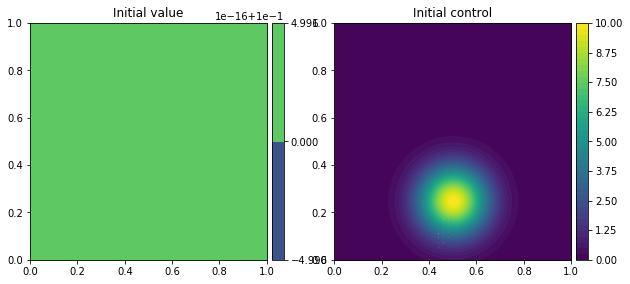

Umax = 0.1
Umin = 0.1


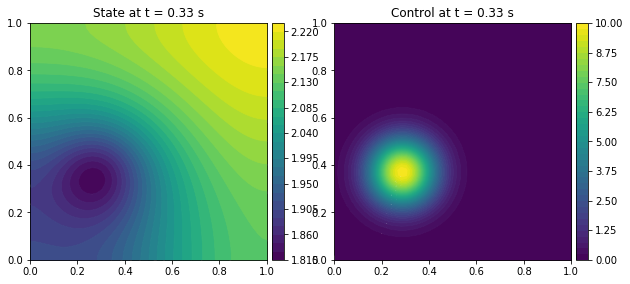

Umax = 2.2296004684847635
Umin = 1.8180443077847903


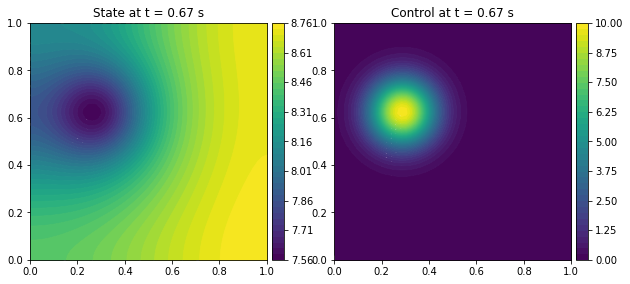

Umax = 8.759292938828548
Umin = 7.5657127507739155


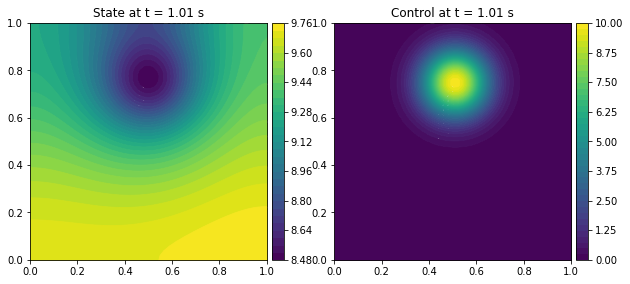

Umax = 9.759430002814682
Umin = 8.481021921811482


In [26]:
plot_states_and_control(U, Q, T, kw_u, kw_q, num_steps, 4)